<a href="https://colab.research.google.com/github/icsd13152/TextExtraction_from_image/blob/main/Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gtts
!pip install easyocr

import nltk
import re
from textblob import TextBlob
import spacy
from gtts import gTTS
import os
from spacy import displacy 
import cv2
# import pytesseract
import numpy as np
from nltk.stem import WordNetLemmatizer
import easyocr
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from tabulate import tabulate
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 1.5 MB/s 
     |████████████████████████████████| 47.6 MB 107 kB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Digital Image

In [2]:
def processWithMedianFilter(image,kernel_size = 3):
    sp_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    median = cv2.medianBlur(sp_gray, kernel_size)
    plt.figure(figsize=(16, 8))
    plt.subplot(121);plt.imshow(sp_gray);plt.title('Before')
    plt.subplot(122);plt.imshow(median, cmap='gray');plt.title('Median filter')

    return median,sp_gray

def processWithGaussianFilter(image):
    sp_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurGaussian = cv2.GaussianBlur(sp_gray, (5, 5), 1)
    plt.figure(figsize=(16, 8))
    plt.subplot(121);plt.imshow(sp_gray);plt.title('Before')
    plt.subplot(122);plt.imshow(blurGaussian, cmap='gray');plt.title('Gaussian Blur')
    return blurGaussian,sp_gray

[([[199, 140], [417, 140], [417, 172], [199, 172]], 'Steps for _Essay Writing', 0.6246121019305008), ([[140, 193], [1084, 193], [1084, 225], [140, 225]], 'Throughout your life at college, you will always come across a professor who likes to give out topics for', 0.7174584643965762), ([[140, 222], [1082, 222], [1082, 254], [140, 254]], "essay writing: This can't be helped except do the assignment vourself and hope to impress the professor", 0.9573467897517279), ([[140, 256], [1084, 256], [1084, 286], [140, 286]], 'with your writing prowess. However; writing an essay is not a simple feat: In fact, when you think about', 0.5346707049359669), ([[140, 290], [264, 290], [264, 316], [140, 316]], 'it, your essay', 0.47462863517332926), ([[318, 288], [706, 288], [706, 316], [318, 316]], 'could make or break your academic career', 0.7785266879896748), ([[139, 339], [1082, 339], [1082, 366], [139, 366]], 'Essays may seem to be just an assignment to some: However; essay writing is more than just t

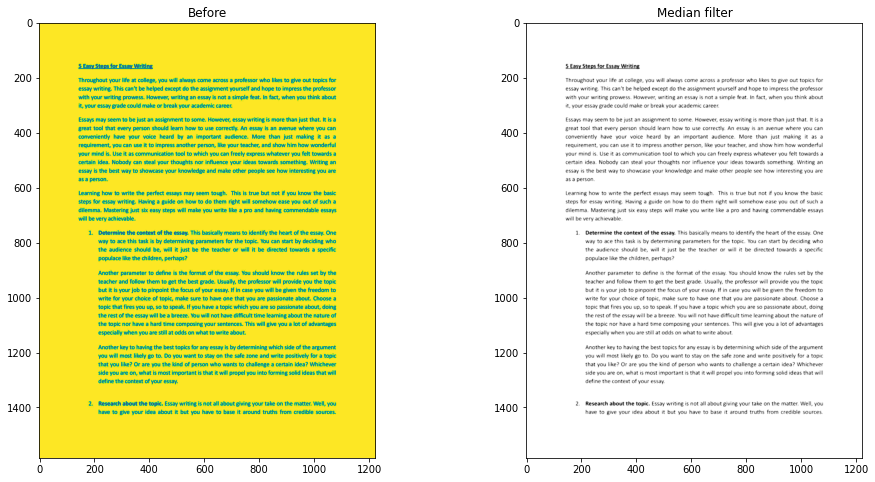

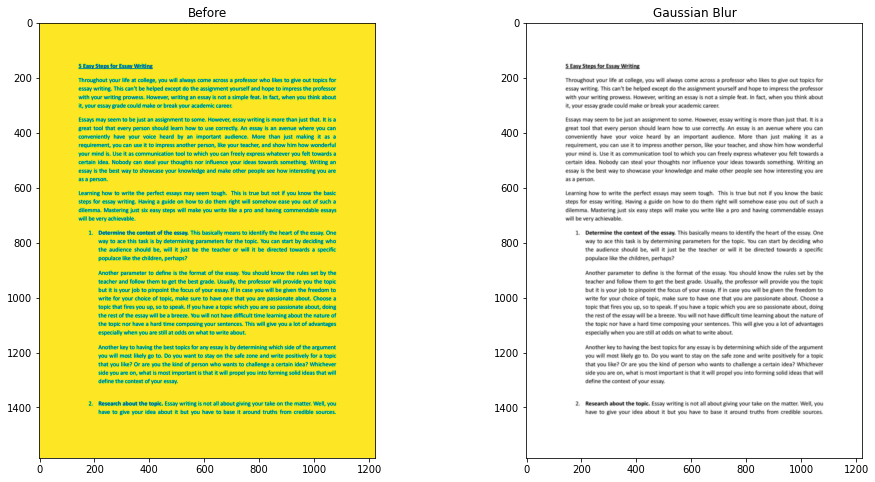

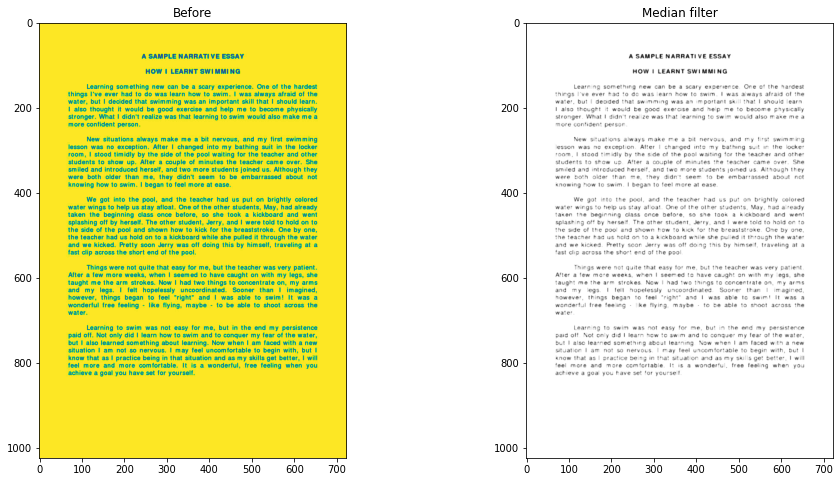

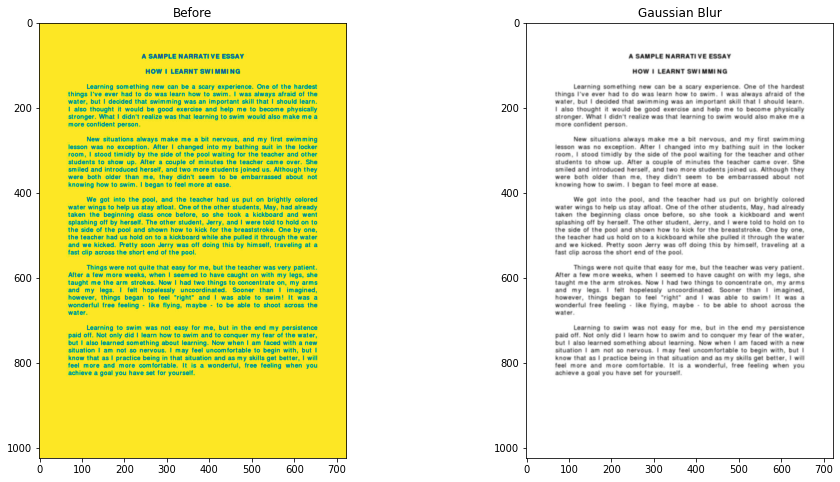

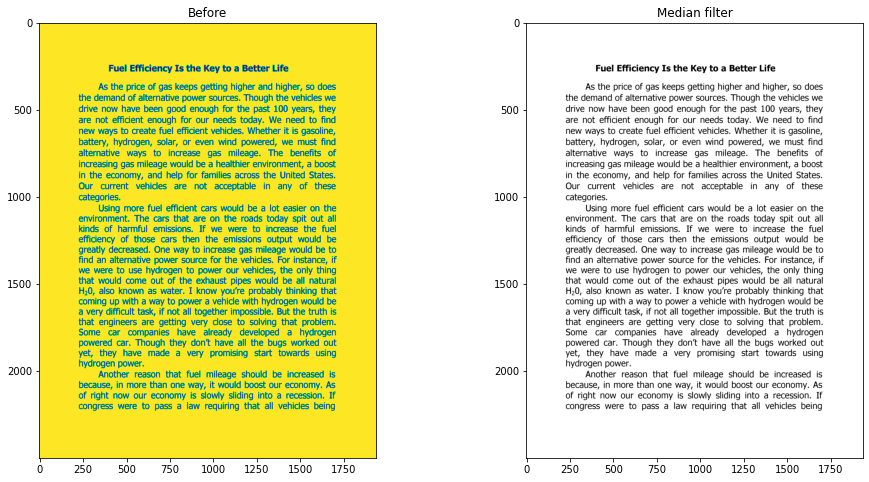

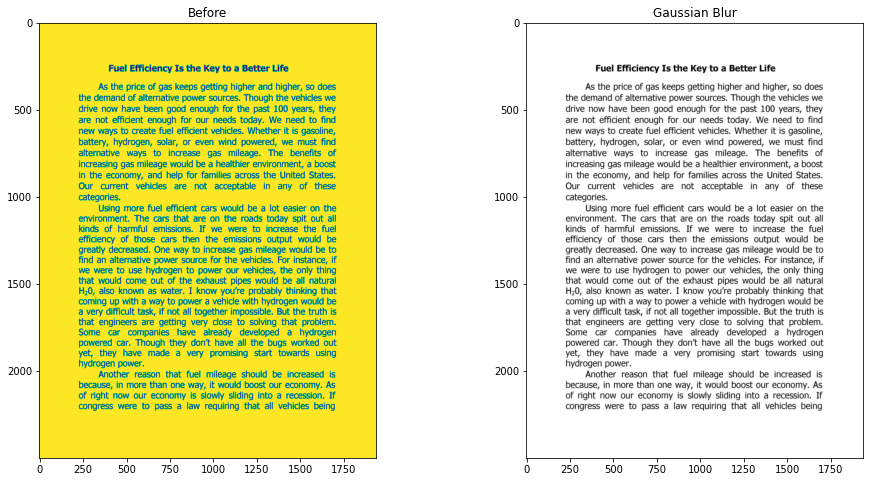

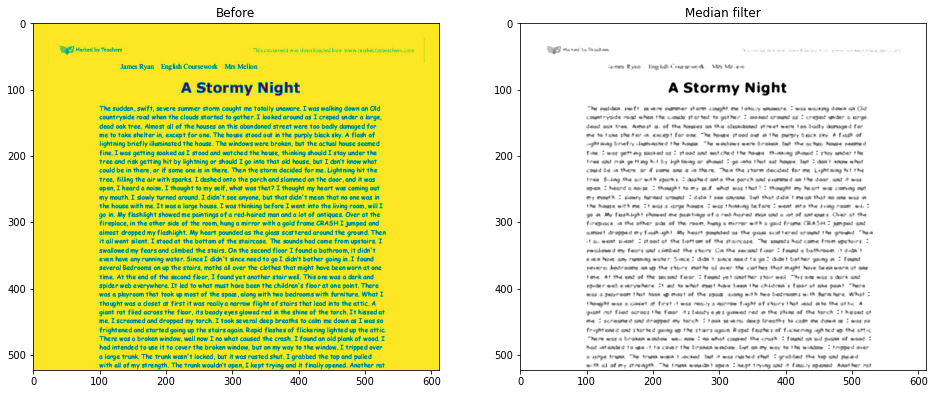

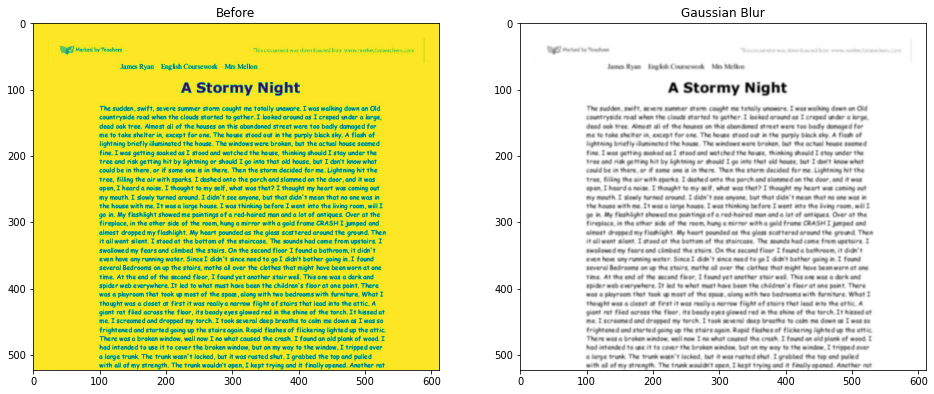

In [8]:
from pylab import rcParams
# read the image
reader = easyocr.Reader(['en'], gpu=True)
images = ['essay.jpg','essay2.jpg','essay3.jpg','essay4.jpg']
Docs = list()
for img in images:
    image = cv2.imread(img)
    median,grey1 = processWithMedianFilter(image,3)
    blurGauss,grey2 = processWithGaussianFilter(image)
    result = reader.readtext(img)
    print(result)
    Docs.append(result)
print(Docs)

[[([[74, 0], [413, 0], [413, 70], [74, 70]], 'HOW TO WRITE', 0.8947373711991135), ([[82, 64], [408, 64], [408, 138], [82, 138]], 'ALT TEXT AND', 0.648447909903557), ([[166, 132], [322, 132], [322, 204], [166, 204]], 'IMACE', 0.9430385842149724), ([[35, 196], [454, 196], [454, 274], [35, 274]], 'DESCRIPTIONS FOR', 0.9710599425444627), ([[106, 266], [382, 266], [382, 338], [106, 338]], 'INSTACRAM', 0.9365443463509078)]]


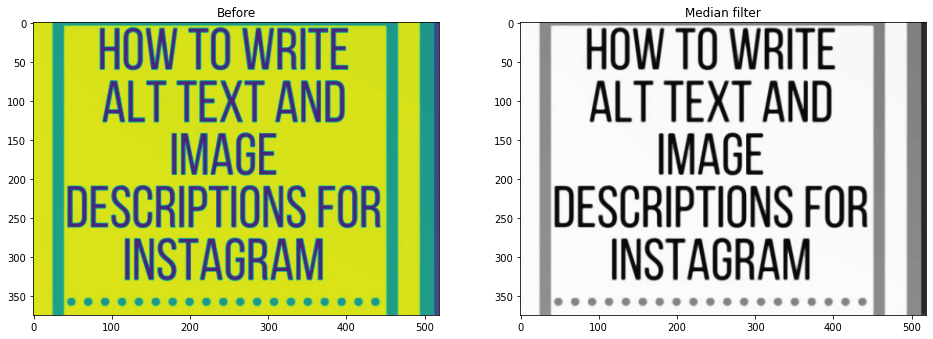

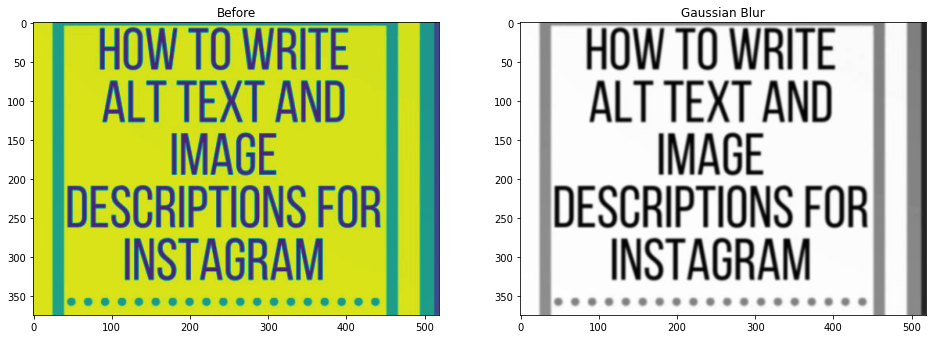

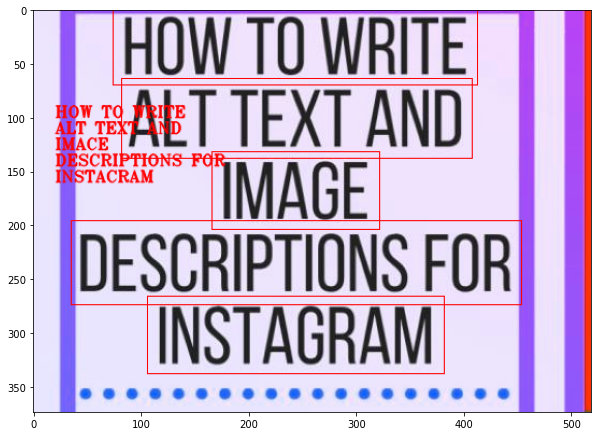

In [92]:
from pylab import rcParams
# read the image
img = cv2.imread('Instagram.jpg')

reader = easyocr.Reader(['en'], gpu=True)
# images = ['handwritten1.jpg']
processWithMedianFilter(img,kernel_size = 3)
processWithGaussianFilter(img)
Docshand = list()
result = reader.readtext('Instagram.jpg')
Docshand.append(result)
print(Docshand)
# for img in images:
#     result = reader.readtext(img)
#     Docs.append(result)
# print(result)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])

    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(255, 0, 0),1) #blue color
    img = cv2.putText(img,text,(20,spacer), 4, 0.5,(255, 0, 0),1,cv2.LINE_AA)
    spacer+=15
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# Handwritten Image

[[([[89, 27], [565, 27], [565, 115], [89, 115]], '1 livE in Lviv', 0.5169740108186452), ([[90, 113], [322, 113], [322, 241], [90, 241]], 'Every', 0.66000202428702), ([[462, 130], [536, 130], [536, 212], [462, 212]], 'I', 0.6803878847679243), ([[84, 216], [408, 216], [408, 314], [84, 314]], 'L work', 0.7581220235404533), ([[421, 135], [719, 135], [719, 371], [421, 371]], 'Iy %', 0.22906840305712062), ([[92, 329], [277, 329], [277, 427], [92, 427]], 'Also', 0.9673411846160889), ([[298, 330], [642, 330], [642, 426], [298, 426]], 'I would', 0.5737614461133979), ([[73, 435], [199, 435], [199, 523], [73, 523]], 'Ike', 0.5108186218917572), ([[222, 430], [754, 430], [754, 530], [222, 530]], 'Lo vlsit Hars', 0.35172670893669983), ([[332.79756320985786, 115.05173323435085], [470.95877977860215, 137.72074274345957], [447.20243679014214, 258.9482667656491], [309.04122022139785, 236.27925725654043]], 'day', 0.9990753176715989)]]


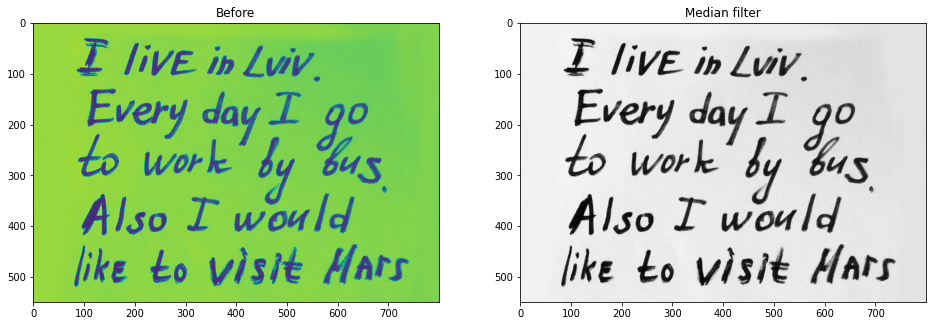

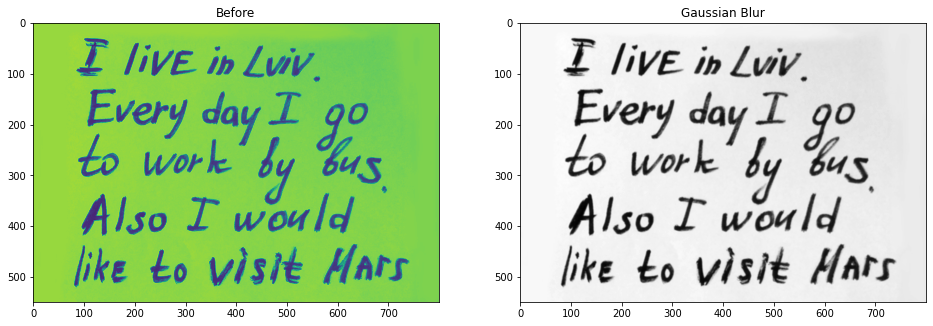

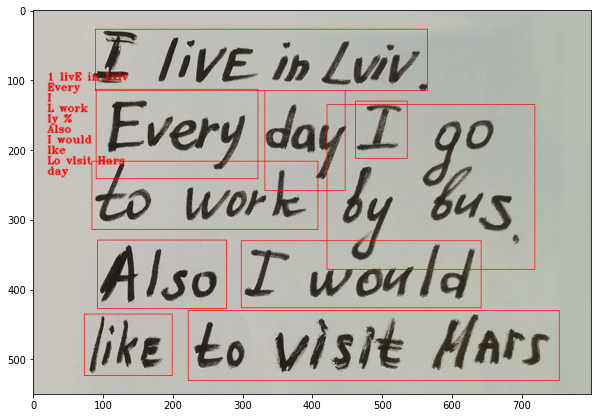

In [93]:
from pylab import rcParams
# read the image
img = cv2.imread('handwritten1.jpg')

reader = easyocr.Reader(['en'], gpu=True)
# images = ['handwritten1.jpg']
processWithMedianFilter(img,kernel_size = 3)
processWithGaussianFilter(img)
Docshand = list()
result = reader.readtext('handwritten1.jpg')
Docshand.append(result)
print(Docshand)
# for img in images:
#     result = reader.readtext(img)
#     Docs.append(result)
# print(result)
spacer = 100
for detection in result: 
    pt1,pt2 = detection[0][0]
    top_left = (int(pt1),int(pt2))
    pt3, pt4 = detection[0][2]
    bottom_right = (int(pt3),int(pt4))
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(255, 0, 0),1) #blue color
    img = cv2.putText(img,text,(20,spacer), 4, 0.5,(255, 0, 0),1,cv2.LINE_AA)
    spacer+=15
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


Παρακάτω θα φτιάξουμε το extracted text σε μορφή κειμένου με σκοπό να κάνουμε την ανάλυση με τεχνικές NLP.

In [13]:
# font = cv2.FONT_HERSHEY_SIMPLEX
documents = list()
confidence = list()

# print(Docs)
for content in Docs:
    # print(content)
    tmpList = list()
    tmpconfidence = list()
    for text in content:
        tmpList.append(text[1])
        
        tmpconfidence.append((text[1],text[2]))
    confidence.append(tmpconfidence)  
    documents.append(tmpList)
# print(confidence) 
# print(documents[1])
finalDocs = list()
for d in documents:
    finalDocs.append(' '.join(i for i in d))


# finalDoc = ' '.join(i for i in document)
# print(finalDocs[1])

# img = cv2.imread('Instagram.jpg')
# spacer = 100
# for detection in result: 
#     top_left = tuple(detection[0][0])
#     bottom_right = tuple(detection[0][2])
#     text = detection[1]
#     img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
#     img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
#     spacer+=15
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()
# img = cv2.imread('annie-spratt-askpr0s66Rg-unsplash.jpg')
# spacer = 100
# for detection in result: 
#     top_left = tuple(detection[0][0])
#     bottom_right = tuple(detection[0][2])
#     text = detection[1]
#     img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
#     img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
#     spacer+=15
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()

['A SAMPLE NARRATI VE ESSAY', 'How', 'LEARNT SW', 'MMING', 'Learning', 'som', 'ething', 'new', 'can be', 'scary experience', 'One', 'of the hardest', "things |'ve", 'ever had', 'was learn', 'how t0', 'swim', 'was always afraid', 'of the', 'water', 'but', 'decided that swimming was an important skill that', 'should Iearn;', 'also thought', 'would', 'be good', 'exercise', 'and', 'help', 'me', 'become', 'physically', 'stronger_', 'What', "didn't realize was that", 'learning to swim would also make me a', 'more confident person_', 'New situations always make', 'me', 'nervous', 'and', 'my', 'first  swimming', 'lesson', 'was', 'no exception.', 'After', 'changed', 'into my bathing', 'the locker', 'room', 'stood', 'timidly by the side of the pool waiting for the teacher and', 'other', 'students t0', 'show', 'up.', 'After', 'couple', 'ofminutes', 'the teacher came', 'over .', 'She', 'smiled and introduced herself;', 'and two more students joined', 'Although they', 'were', 'both', 'older', 'than

Η παρακάτω συνάρτηση έχει την δυνατότητα με βάση κάποιο threshold ως προς το confidence που προκύπτει για κάθε extracted text, να μας επιστρέφει τα κείμενα-λέξεις πάνω απο αυτό το threshold, και το πλήθος αυτών απο όλο το σύνολο.

In [18]:
def getBestScore(scores,threshold=0.80):
    best = list()
    counter = 0
    # for s in scores:
    for text, score in scores:
          if score >= threshold:
              counter += 1
              best.append((text,score))
    return (best,counter,len(scores))

In [19]:
bestFoundWords, totalBest, total= getBestScore(confidence,threshold=0.85)

print("With this threshold found ",totalBest, " words from ",total)


With this threshold found  258  words from  578


# Text Analysis using NLTK

In [21]:
# tokensNLTK = list()
# for sete in finalDocs:
tokensNLTK1 = nltk.tokenize.word_tokenize(finalDocs[0])
tokensNLTK2 = nltk.tokenize.word_tokenize(finalDocs[1])
tokensNLTK3 = nltk.tokenize.word_tokenize(finalDocs[2])
tokensNLTK4 = nltk.tokenize.word_tokenize(finalDocs[3])
print(tokensNLTK2)
nltk.pos_tag(tokensNLTK1)
nltk.pos_tag(tokensNLTK2)
nltk.pos_tag(tokensNLTK3)
nltk.pos_tag(tokensNLTK4)

['A', 'SAMPLE', 'NARRATI', 'VE', 'ESSAY', 'How', 'LEARNT', 'SW', 'MMING', 'Learning', 'som', 'ething', 'new', 'can', 'be', 'scary', 'experience', 'One', 'of', 'the', 'hardest', 'things', '|', "'ve", 'ever', 'had', 'was', 'learn', 'how', 't0', 'swim', 'was', 'always', 'afraid', 'of', 'the', 'water', 'but', 'decided', 'that', 'swimming', 'was', 'an', 'important', 'skill', 'that', 'should', 'Iearn', ';', 'also', 'thought', 'would', 'be', 'good', 'exercise', 'and', 'help', 'me', 'become', 'physically', 'stronger_', 'What', 'did', "n't", 'realize', 'was', 'that', 'learning', 'to', 'swim', 'would', 'also', 'make', 'me', 'a', 'more', 'confident', 'person_', 'New', 'situations', 'always', 'make', 'me', 'nervous', 'and', 'my', 'first', 'swimming', 'lesson', 'was', 'no', 'exception', '.', 'After', 'changed', 'into', 'my', 'bathing', 'the', 'locker', 'room', 'stood', 'timidly', 'by', 'the', 'side', 'of', 'the', 'pool', 'waiting', 'for', 'the', 'teacher', 'and', 'other', 'students', 't0', 'show', 

[('Markeg', 'NNP'),
 ('Teichen', 'NNP'),
 ('DCUI', 'NNP'),
 ('Mtke', 'NNP'),
 ('lacI', 'NN'),
 (':', ':'),
 ('Jan', 'NN'),
 (':', ':'),
 ('RVr', 'NNP'),
 ('Enclizh', 'NNP'),
 ('(', '('),
 ('ourecwonz', 'JJ'),
 ('Mc', 'NNP'),
 ('Melbn', 'NNP'),
 ('Stormy', 'NNP'),
 ('Night', 'NNP'),
 ('The', 'DT'),
 ('sudden', 'JJ'),
 (',', ','),
 ('swift', 'JJ'),
 (',', ','),
 ('severe', 'JJ'),
 ('Sumne', 'NNP'),
 ('Stomn', 'NNP'),
 ('totally', 'RB'),
 ('Icalm', 'NNP'),
 ('Fas', 'NNP'),
 ('Ha', 'NNP'),
 ('Ikina', 'NNP'),
 ('dalnn', 'NN'),
 ('ccrtryside', 'NN'),
 ('raad', 'NN'),
 ('when', 'WRB'),
 ('the', 'DT'),
 ('clords', 'NNS'),
 ('Started', 'VBD'),
 ('gather', 'RB'),
 ('baked', 'VBN'),
 ('arand', 'NN'),
 ('creped', 'VBD'),
 ('mder', 'JJR'),
 ('hrge', 'NN'),
 (',', ','),
 ('dead', 'JJ'),
 ('aak', 'NN'),
 ('Tree', 'NNP'),
 (';', ':'),
 ('AMm', 'NNP'),
 (')', ')'),
 ('ST', 'VBD'),
 ('the', 'DT'),
 ('hiuses', 'NNS'),
 ('this', 'DT'),
 ('abandined', 'VBD'),
 ('5tret', 'CD'),
 ('42r2', 'CD'),
 ('T43', 'NN

# Text Analysis using SpaCy

In [22]:

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
# create spacy 
tokensSpacy1 = nlp(finalDocs[0])
tokensSpacy2 = nlp(finalDocs[1])
tokensSpacy3 = nlp(finalDocs[2])
tokensSpacy4 = nlp(finalDocs[3])
tokensSpacy = list()
for token in tokensSpacy1:
    print(token.text,'->',token.pos_)
    tokensSpacy.append(token.text)

tokensSpacy22 = list()
for token in tokensSpacy2:
    print(token.text,'->',token.pos_)
    tokensSpacy22.append(token.text)

tokensSpacy33 = list()
for token in tokensSpacy3:
    print(token.text,'->',token.pos_)
    tokensSpacy33.append(token.text)

tokensSpacy44 = list()
for token in tokensSpacy4:
    print(token.text,'->',token.pos_)
    tokensSpacy44.append(token.text)

Steps -> NOUN
for -> ADP
_ -> PROPN
Essay -> PROPN
Writing -> PROPN
Throughout -> ADP
your -> DET
life -> NOUN
at -> ADP
college -> NOUN
, -> PUNCT
you -> PRON
will -> VERB
always -> ADV
come -> VERB
across -> ADP
a -> DET
professor -> NOUN
who -> PRON
likes -> VERB
to -> PART
give -> VERB
out -> ADP
topics -> NOUN
for -> ADP
essay -> ADJ
writing -> NOUN
: -> PUNCT
This -> DET
ca -> VERB
n't -> PART
be -> AUX
helped -> VERB
except -> SCONJ
do -> AUX
the -> DET
assignment -> NOUN
vourself -> NOUN
and -> CCONJ
hope -> VERB
to -> PART
impress -> VERB
the -> DET
professor -> NOUN
with -> ADP
your -> DET
writing -> NOUN
prowess -> NOUN
. -> PUNCT
However -> ADV
; -> PUNCT
writing -> VERB
an -> DET
essay -> NOUN
is -> AUX
not -> PART
a -> DET
simple -> ADJ
feat -> NOUN
: -> PUNCT
In -> ADP
fact -> NOUN
, -> PUNCT
when -> ADV
you -> PRON
think -> VERB
about -> ADP
it -> PRON
, -> PUNCT
your -> DET
essay -> NOUN
could -> VERB
make -> VERB
or -> CCONJ
break -> VERB
your -> DET
academic -> ADJ
c

# Text Analysis using Custom Tokenizer

In [23]:
def customTokenizer(text):
    pattern = re.compile(r'(?:[A-Z]\.)+|[A-Za-z]+\.|\d+(?:[\./]\d+)|n\'t|\b\w+(?!\'t)|\w+(?:-\w+)*|[!\"#$%&\'()*+,./:;<=>?@[\]^_`{|}~]|-{2}')  
    tmpTokens = pattern.findall(text)
    tokens = list()
    for i in tmpTokens:
        i = i.strip()
        i = i.replace('/','\\/')
        tokens.append(i)
    
    return tokens

tokensCustom1 = customTokenizer(finalDocs[0])
tokensCustom2 = customTokenizer(finalDocs[1])
tokensCustom3 = customTokenizer(finalDocs[2])
tokensCustom4 = customTokenizer(finalDocs[3])
# print(tokensCustom)

In [24]:
def getGroundsFromFile(path, tokenizer = 'NLTK'):
    # path = 'essay2.txt'
    tokens = list()
    nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
    with open(path,'r') as f:
        text = f.read()
        tokensWordTokenize = nltk.tokenize.word_tokenize(text)
        docSpacy = nlp(text)
    tokensSpacy = list()
    for token in docSpacy:
        tokensSpacy.append(token.text)
    if tokenizer == 'NLTK':
        tokens = tokensWordTokenize
    else:
        tokens =  tokensSpacy   
    return tokens

In [26]:
tokensGroundNLTK = getGroundsFromFile('essay.txt', tokenizer = 'NLTK')
tokensGroundSpacy = getGroundsFromFile('essay.txt', tokenizer = 'Spacy')

tokensGroundNLTK2 = getGroundsFromFile('essay2.txt', tokenizer = 'NLTK')
tokensGroundSpacy2 = getGroundsFromFile('essay2.txt', tokenizer = 'Spacy')

tokensGroundNLTK3 = getGroundsFromFile('essay3.txt', tokenizer = 'NLTK')
tokensGroundSpacy3 = getGroundsFromFile('essay3.txt', tokenizer = 'Spacy')

tokensGroundNLTK4 = getGroundsFromFile('essay4.txt', tokenizer = 'NLTK')
tokensGroundSpacy4 = getGroundsFromFile('essay4.txt', tokenizer = 'Spacy')

# Lemmatization

In [27]:
def funclemmatize(tokens):
    lemmatizer = WordNetLemmatizer()


    for token in tokens:
        print(token, '->', lemmatizer.lemmatize(token))

Ενδεικτικά παρακάτω το lemmatization απο την πρώτη εικόνα.

In [29]:
print("=============NLTK==============")
funclemmatize(tokensNLTK1)
print("=============SpaCy==============")
funclemmatize(tokensSpacy)
# funclemmatize(correctedTextblob)
print("=============Custom==============")
funclemmatize(tokensCustom1)

=============NLTK==============
Steps -> Steps
for -> for
_Essay -> _Essay
Writing -> Writing
Throughout -> Throughout
your -> your
life -> life
at -> at
college -> college
, -> ,
you -> you
will -> will
always -> always
come -> come
across -> across
a -> a
professor -> professor
who -> who
likes -> like
to -> to
give -> give
out -> out
topics -> topic
for -> for
essay -> essay
writing -> writing
: -> :
This -> This
ca -> ca
n't -> n't
be -> be
helped -> helped
except -> except
do -> do
the -> the
assignment -> assignment
vourself -> vourself
and -> and
hope -> hope
to -> to
impress -> impress
the -> the
professor -> professor
with -> with
your -> your
writing -> writing
prowess -> prowess
. -> .
However -> However
; -> ;
writing -> writing
an -> an
essay -> essay
is -> is
not -> not
a -> a
simple -> simple
feat -> feat
: -> :
In -> In
fact -> fact
, -> ,
when -> when
you -> you
think -> think
about -> about
it -> it
, -> ,
your -> your
essay -> essay
could -> could
make -> make
or -> 

# Stemming with PorterStemmer

In [30]:


def porterStem(tokens): 
    ps = PorterStemmer()
#     tokenss = customTokenizer(sntnc)
    stems = list()
    for token in tokens:
        print(token, '->', ps.stem(token))
        stems.append(ps.stem(token))
    return stems

In [31]:
print("=============NLTK==============")
stemsNLTK = porterStem(tokensNLTK1)
print("=============Spacy==============")
stemsSpacy = porterStem(tokensSpacy)
# porterStem(correctedTextblob)
print("=============Custom==============")
stemsCustomTok = porterStem(tokensCustom1)

print("=============NLTK==============")
stemsNLTK2 = porterStem(tokensNLTK2)
print("=============Spacy==============")
stemsSpacy2 = porterStem(tokensSpacy22)
# porterStem(correctedTextblob)
print("=============Custom==============")
stemsCustomTok2 = porterStem(tokensCustom2)

print("=============NLTK==============")
stemsNLTK3 = porterStem(tokensNLTK3)
print("=============Spacy==============")
stemsSpacy3 = porterStem(tokensSpacy33)
# porterStem(correctedTextblob)
print("=============Custom==============")
stemsCustomTok3 = porterStem(tokensCustom3)

print("=============NLTK==============")
stemsNLTK4 = porterStem(tokensNLTK4)
print("=============Spacy==============")
stemsSpacy4 = porterStem(tokensSpacy44)
# porterStem(correctedTextblob)
print("=============Custom==============")
stemsCustomTok4 = porterStem(tokensCustom4)

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
writing -> write
: -> :
This -> thi
ca -> ca
n't -> n't
be -> be
helped -> help
except -> except
do -> do
the -> the
assignment -> assign
vourself -> vourself
and -> and
hope -> hope
to -> to
impress -> impress
the -> the
professor -> professor
with -> with
your -> your
writing -> write
prowess -> prowess
. -> .
However -> howev
; -> ;
writing -> write
an -> an
essay -> essay
is -> is
not -> not
a -> a
simple -> simpl
feat -> feat
: -> :
In -> In
fact -> fact
, -> ,
when -> when
you -> you
think -> think
about -> about
it -> it
, -> ,
your -> your
essay -> essay
could -> could
make -> make
or -> or
break -> break
your -> your
academic -> academ
career -> career
Essays -> essay
may -> may
seem -> seem
to -> to
be -> be
just -> just
an -> an
assignment -> assign
to -> to
some -> some
: -> :
However -> howev
; -> ;
essay -> essay
writing -> write
is -> is
more -> more
than -> than
just -> just
that -> that
: -> :
It -> It
is -> is
a -

# Stemming with SnowballStemmer

In [32]:

def snowballStem(tokens, lng):
    sb = SnowballStemmer(lng)
    stems = list()
    for wd in tokens:
        print(wd, '->', sb.stem(wd))
        stems.append(sb.stem(wd))
    return stems

In [33]:
print("=============NLTK==============")
stemsSnowNLTK = snowballStem(tokensNLTK1, 'english')
print("=============SpaCy==============")
stemsSnowSpacy = snowballStem(tokensSpacy, 'english')
# snowballStem(correctedTextblob, 'english')
print("=============Custom==============")
stemsSnowCustomTok = snowballStem(tokensCustom1, 'english')

print("=============NLTK==============")
stemsSnowNLTK2 = snowballStem(tokensNLTK2, 'english')
print("=============SpaCy==============")
stemsSnowSpacy2 = snowballStem(tokensSpacy22, 'english')
# snowballStem(correctedTextblob, 'english')
print("=============Custom==============")
stemsSnowCustomTok2 = snowballStem(tokensCustom2, 'english')

print("=============NLTK==============")
stemsSnowNLTK3 = snowballStem(tokensNLTK3, 'english')
print("=============SpaCy==============")
stemsSnowSpacy3 = snowballStem(tokensSpacy33, 'english')
# snowballStem(correctedTextblob, 'english')
print("=============Custom==============")
stemsSnowCustomTok3 = snowballStem(tokensCustom3, 'english')

print("=============NLTK==============")
stemsSnowNLTK4 = snowballStem(tokensNLTK4, 'english')
print("=============SpaCy==============")
stemsSnowSpacy4 = snowballStem(tokensSpacy44, 'english')
# snowballStem(correctedTextblob, 'english')
print("=============Custom==============")
stemsSnowCustomTok4 = snowballStem(tokensCustom4, 'english')

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
writing -> write
: -> :
This -> this
ca -> ca
n't -> n't
be -> be
helped -> help
except -> except
do -> do
the -> the
assignment -> assign
vourself -> vourself
and -> and
hope -> hope
to -> to
impress -> impress
the -> the
professor -> professor
with -> with
your -> your
writing -> write
prowess -> prowess
. -> .
However -> howev
; -> ;
writing -> write
an -> an
essay -> essay
is -> is
not -> not
a -> a
simple -> simpl
feat -> feat
: -> :
In -> in
fact -> fact
, -> ,
when -> when
you -> you
think -> think
about -> about
it -> it
, -> ,
your -> your
essay -> essay
could -> could
make -> make
or -> or
break -> break
your -> your
academic -> academ
career -> career
Essays -> essay
may -> may
seem -> seem
to -> to
be -> be
just -> just
an -> an
assignment -> assign
to -> to
some -> some
: -> :
However -> howev
; -> ;
essay -> essay
writing -> write
is -> is
more -> more
than -> than
just -> just
that -> that
: -> :
It -> it
is -> is
a 

# Custom Stemmer

In [34]:
def customStemming(token): #(\w+?)(?=ly|es|(?<!s)s|y)
    stems = re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$',token)
    stem = stems[0][0]
    return stem


In [35]:
def getStemsFromCustom(tokens):
    stems = list()
    for t in tokens:
        print(t, '->', customStemming(t))
        stems.append(customStemming(t))
    return stems

In [36]:
stemsCustomNLTK1 = getStemsFromCustom(tokensNLTK1)
stemsCustom1 = getStemsFromCustom(tokensCustom1)
stemsCustomSpacy1 = getStemsFromCustom(tokensSpacy)

stemsCustomNLTK2 = getStemsFromCustom(tokensNLTK2)
stemsCustom2 = getStemsFromCustom(tokensCustom2)
stemsCustomSpacy2 = getStemsFromCustom(tokensSpacy22)

stemsCustomNLTK3 = getStemsFromCustom(tokensNLTK3)
stemsCustom3 = getStemsFromCustom(tokensCustom3)
stemsCustomSpacy3 = getStemsFromCustom(tokensSpacy33)

stemsCustomNLTK4 = getStemsFromCustom(tokensNLTK4)
stemsCustom4 = getStemsFromCustom(tokensCustom4)
stemsCustomSpacy4 = getStemsFromCustom(tokensSpacy44)

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
professor -> professor
who -> who
likes -> lik
to -> to
give -> g
out -> out
topics -> topic
for -> for
essay -> essay
writing -> writ
: -> :
This -> Thi
ca -> ca
n't -> n't
be -> be
helped -> help
except -> except
do -> do
the -> the
assignment -> assign
vourself -> vourself
and -> and
hope -> hope
to -> to
impress -> impres
the -> the
professor -> professor
with -> with
your -> your
writing -> writ
prowess. -> prowess.
However -> However
; -> ;
writing -> writ
an -> an
essay -> essay
is -> i
not -> not
a -> a
simple -> simple
feat -> feat
: -> :
In -> In
fact -> fact
, -> ,
when -> when
you -> you
think -> think
about -> about
it -> it
, -> ,
your -> your
essay -> essay
could -> could
make -> make
or -> or
break -> break
your -> your
academic -> academic
career -> career
Essays -> Essay
may -> may
seem -> seem
to -> to
be -> be
just -> just
an -> an
assignment -> assign
to -> to
some -> some
: -> :
However -> However
; -> ;
essay

In [37]:
def getGroundsFromFileStem(path, tokenizer = 'NLTK',stemmer = 'Porter'):
    # path = 'essay2.txt'
    tokens = list()
    stems = list()
    nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
    with open(path,'r') as f:
        text = f.read()
        tokensWordTokenize = nltk.tokenize.word_tokenize(text)
        docSpacy = nlp(text)
    tokensSpacy = list()
    for token in docSpacy:
        tokensSpacy.append(token.text)
    if tokenizer == 'NLTK':
        tokens = tokensWordTokenize
    else:
        tokens =  tokensSpacy 
    # print(tokens)
    if stemmer == 'Porter':
       stems = porterStem(tokens)
    else:
       stems = snowballStem(tokens,'english')  
    return stems

In [38]:
stemsGroundNLTKPorter11 = getGroundsFromFileStem('essay.txt','NLTK','Porter')
stemsGroundSpaCyPorter11 = getGroundsFromFileStem('essay.txt','SpaCy','Porter')
stemsGroundNLTKSnow11 = getGroundsFromFileStem('essay.txt','NLTK','SnowBall')
stemsGroundSpaCySnow11 = getGroundsFromFileStem('essay.txt','SpaCy','SnowBall')

stemsGroundNLTKPorter22 = getGroundsFromFileStem('essay2.txt','NLTK','Porter')
stemsGroundSpaCyPorter22 = getGroundsFromFileStem('essay2.txt','SpaCy','Porter')
stemsGroundNLTKSnow22 = getGroundsFromFileStem('essay2.txt','NLTK','SnowBall')
stemsGroundSpaCySnow22 = getGroundsFromFileStem('essay2.txt','SpaCy','SnowBall')

stemsGroundNLTKPorter33 = getGroundsFromFileStem('essay3.txt','NLTK','Porter')
stemsGroundSpaCyPorter33 = getGroundsFromFileStem('essay3.txt','SpaCy','Porter')
stemsGroundNLTKSnow33 = getGroundsFromFileStem('essay3.txt','NLTK','SnowBall')
stemsGroundSpaCySnow33 = getGroundsFromFileStem('essay3.txt','SpaCy','SnowBall')

stemsGroundNLTKPorter44 = getGroundsFromFileStem('essay4.txt','NLTK','Porter')
stemsGroundSpaCyPorter44 = getGroundsFromFileStem('essay4.txt','SpaCy','Porter')
stemsGroundNLTKSnow44 = getGroundsFromFileStem('essay4.txt','NLTK','SnowBall')
stemsGroundSpaCySnow44 = getGroundsFromFileStem('essay4.txt','SpaCy','SnowBall')

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
and -> and
I -> i
were -> were
told -> told
to -> to
hold -> hold
on -> on
to -> to
the -> the
side -> side
of -> of
the -> the
pool -> pool
and -> and
shown -> shown
how -> how
to -> to
kick -> kick
for -> for
the -> the
breaststroke -> breaststrok
. -> .
One -> one
by -> by
one -> one
, -> ,
the -> the
teacher -> teacher
had -> had
us -> us
hold -> hold
on -> on
to -> to
a -> a
kickboard -> kickboard
while -> while
she -> she
pulled -> pull
it -> it
through -> through
the -> the
water -> water
and -> and
we -> we
kicked -> kick
. -> .
Pretty -> pretti
soon -> soon
Jerry -> jerri
was -> was
off -> off
doing -> do
this -> this
by -> by
himself -> himself
, -> ,
traveling -> travel
at -> at
a -> a
fast -> fast
clip -> clip
across -> across
the -> the
short -> short
end -> end
of -> of
the -> the
pool.Things -> pool.th
were -> were
not -> not
quite -> quit
that -> that
easy -> easi
for -> for
me -> me
, -> ,
but -> but
the -> the
tea

In [ ]:
displacy.render(tokensSpacy1, style='dep',jupyter=True)

# Metrics And Analysis

In [39]:
# def joinGroundTruthTokenInOneList(grounTruth):
#     tokens = list()
#     for index in range(len(grounTruth)):
#         tokens.append(tmpTokens[index])
#     return tokens


def calcPrecision(texts, grounTruth): 
    precision = 0.0

    counter = 0 
    for token in texts:
        if token in grounTruth:
            counter = counter + 1
    print("No. of groundTruthTokens = ",len(grounTruth))
    relevantTokens = counter
    print("Relevant Tokens = ",relevantTokens)
    retrievedTokens = len(texts)
    print("Retrieved Tokens = ",retrievedTokens)
    precision = relevantTokens  / retrievedTokens
    print("Precision = ",precision)
   
    return precision

    
def calcRecall(texts, grounTruth):
    recall = 0.00
    counter = 0    
    for token in texts:
        if token in grounTruth:
            counter = counter + 1
    relevantTokens = counter
    correctTokens = len(grounTruth)
    recall = relevantTokens  / correctTokens
    print("Recall = ",recall)
         
    return recall

def calcF1Score(precision, recall):
    f1 = (2 * precision * recall) / (precision + recall)
    return f1


    
# files = treebank.fileids()
# customTokens = customTokenizer(text)
# groundTruthTokens = joinGroundTruthTokenInOneList(files)

# groundTruthSentences = joinGroundTruthTokenInOneList(files,False)

## Essay 1

In [40]:
from nltk.probability import FreqDist
# def getFreq(tokens):



dicNLTK = FreqDist(tokensNLTK1)
dicSpacy = FreqDist(tokensSpacy)
# dicNLTK = FreqDist(tokensNLTK)
diccustom = FreqDist(tokensCustom1)
filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
filter_tokens2 = dict([(m, n) for m, n in dicSpacy.items() if n == 1])
filter_tokens3 = dict([(m, n) for m, n in diccustom.items() if n == 1])
observed1_1 = len(filter_tokens1)/len(dicNLTK)
observed1_2 = len(filter_tokens2)/len(dicSpacy)
observed1_3 = len(filter_tokens3)/len(diccustom)
top30_1NLTK = FreqDist(tokensNLTK1).most_common(40)
top30_1Spacy = FreqDist(tokensSpacy).most_common(40)
top30_1Custom = FreqDist(tokensCustom1).most_common(40)

==============NLTK as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  640
Relevant Tokens =  578
Retrieved Tokens =  617
Precision =  0.9367909238249594
Recall =  0.903125
F1 - Score =  0.9196499602227526
==============SpaCy as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  675
Relevant Tokens =  578
Retrieved Tokens =  617
Precision =  0.9367909238249594
Recall =  0.8562962962962963
F1 - Score =  0.8947368421052632
==============NLTK as grountTruth==============
No. of groundTruthTokens =  626
Relevant Tokens =  608
Retrieved Tokens =  617
Precision =  0.9854132901134521
Recall =  0.9712460063897763
F1 - Score =  0.9782783588093322
==============SpaCy as grountTruth==============
No. of groundTruthTokens =  630
Relevant Tokens =  605
Retrieved Tokens =  617
Precision =  0.9805510534846029
Recall =  0.9603174603174603
F1 - Score =  0.9703287890938253


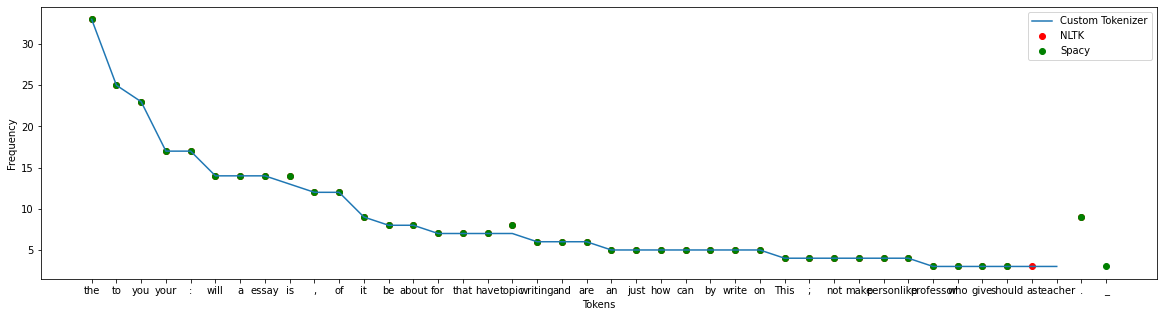

In [41]:
print("==============NLTK as grountTruth from GroundTruth File ==============")
precisionNLTK = calcPrecision(tokensCustom1,tokensGroundNLTK)    
recallNLTK = calcRecall(tokensCustom1, tokensGroundNLTK)
f1nltkEN = calcF1Score(precisionNLTK, recallNLTK)
print("F1 - Score = ",f1nltkEN)
print("==============SpaCy as grountTruth from GroundTruth File ==============")
precisionSpac = calcPrecision(tokensCustom1, tokensGroundSpacy)    
recallSpac = calcRecall(tokensCustom1, tokensGroundSpacy)
f1Spac = calcF1Score(precisionSpac, recallSpac)
print("F1 - Score = ",f1Spac)

print("==============NLTK as grountTruth==============")
precisionNLTK2 = calcPrecision(tokensCustom1,tokensNLTK1)    
recallNLTK2 = calcRecall(tokensCustom1, tokensNLTK1)
f1nltkEN2 = calcF1Score(precisionNLTK2, recallNLTK2)
print("F1 - Score = ",f1nltkEN2)
print("==============SpaCy as grountTruth==============")
precisionSpac2 = calcPrecision(tokensCustom1, tokensSpacy)    
recallSpac2 = calcRecall(tokensCustom1, tokensSpacy)
f1Spac2 = calcF1Score(precisionSpac2, recallSpac2)
print("F1 - Score = ",f1Spac2)
# dicNLTK = FreqDist(tokensNLTK)
# filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
# observed1_1 = len(filter_tokens1)/len(dic)
# top30_1NLTK = FreqDist(tokensNLTK).most_common(30)
# top30_1Truth = FreqDist(groundTruthTokens).most_common(30)

plt.figure(figsize=(20, 5))
plt.plot(*zip(*top30_1Custom),label='Custom Tokenizer')
plt.scatter(*zip(*top30_1NLTK),color = 'red',label='NLTK')
plt.scatter(*zip(*top30_1Spacy),color = 'green',label='Spacy')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()



## Essay 2

==============NLTK as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  524
Relevant Tokens =  396
Retrieved Tokens =  445
Precision =  0.8898876404494382
Recall =  0.7557251908396947
F1 - Score =  0.8173374613003096
==============SpaCy as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  557
Relevant Tokens =  401
Retrieved Tokens =  445
Precision =  0.9011235955056179
Recall =  0.7199281867145422
F1 - Score =  0.8003992015968063
==============NLTK as grountTruth==============
No. of groundTruthTokens =  449
Relevant Tokens =  438
Retrieved Tokens =  445
Precision =  0.9842696629213483
Recall =  0.9755011135857461
F1 - Score =  0.9798657718120805
==============SpaCy as grountTruth==============
No. of groundTruthTokens =  460
Relevant Tokens =  428
Retrieved Tokens =  445
Precision =  0.9617977528089887
Recall =  0.9304347826086956
F1 - Score =  0.9458563535911602


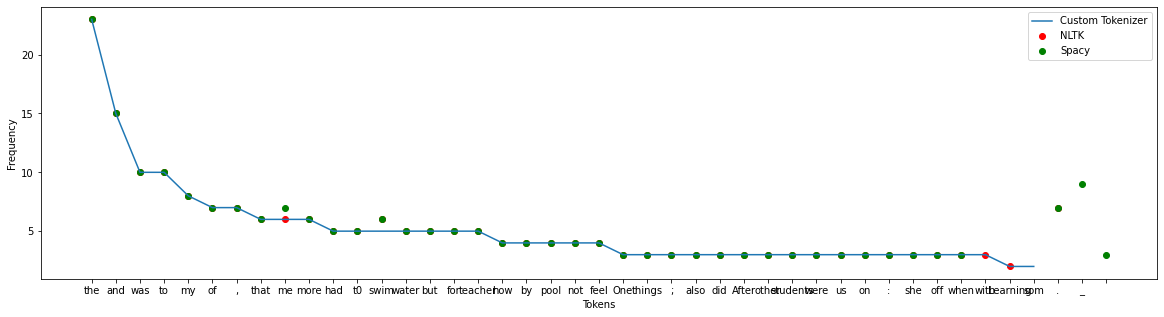

In [43]:
dicNLTK = FreqDist(tokensNLTK2)
dicSpacy = FreqDist(tokensSpacy22)
# dicNLTK = FreqDist(tokensNLTK)
diccustom = FreqDist(tokensCustom2)
filter_tokens12 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
filter_tokens22 = dict([(m, n) for m, n in dicSpacy.items() if n == 1])
filter_tokens32 = dict([(m, n) for m, n in diccustom.items() if n == 1])
observed2_1 = len(filter_tokens12)/len(dicNLTK)
observed2_2 = len(filter_tokens22)/len(dicSpacy)
observed2_3 = len(filter_tokens32)/len(diccustom)
top30_1NLTK2 = FreqDist(tokensNLTK2).most_common(40)
top30_1Spacy2 = FreqDist(tokensSpacy22).most_common(40)
top30_1Custom2 = FreqDist(tokensCustom2).most_common(40)

print("==============NLTK as grountTruth from GroundTruth File ==============")
precisionNLTKes2 = calcPrecision(tokensCustom2,tokensGroundNLTK2)    
recallNLTKes2 = calcRecall(tokensCustom2, tokensGroundNLTK2)
f1nltkENes2 = calcF1Score(precisionNLTKes2, recallNLTKes2)
print("F1 - Score = ",f1nltkENes2)
print("==============SpaCy as grountTruth from GroundTruth File ==============")
precisionSpaces2 = calcPrecision(tokensCustom2, tokensGroundSpacy2)    
recallSpaces2 = calcRecall(tokensCustom2, tokensGroundSpacy2)
f1Spaces2 = calcF1Score(precisionSpaces2, recallSpaces2)
print("F1 - Score = ",f1Spaces2)

print("==============NLTK as grountTruth==============")
precisionNLTK2es2 = calcPrecision(tokensCustom2,tokensNLTK2)    
recallNLTK2es2 = calcRecall(tokensCustom2, tokensNLTK2)
f1nltkEN2es2 = calcF1Score(precisionNLTK2es2, recallNLTK2es2)
print("F1 - Score = ",f1nltkEN2es2)
print("==============SpaCy as grountTruth==============")
precisionSpac2es2 = calcPrecision(tokensCustom2, tokensSpacy22)    
recallSpac2es2 = calcRecall(tokensCustom2, tokensSpacy22)
f1Spac2es2 = calcF1Score(precisionSpac2es2, recallSpac2es2)
print("F1 - Score = ",f1Spac2es2)
# dicNLTK = FreqDist(tokensNLTK)
# filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
# observed1_1 = len(filter_tokens1)/len(dic)
# top30_1NLTK = FreqDist(tokensNLTK).most_common(30)
# top30_1Truth = FreqDist(groundTruthTokens).most_common(30)

plt.figure(figsize=(20, 5))
plt.plot(*zip(*top30_1Custom2),label='Custom Tokenizer')
plt.scatter(*zip(*top30_1NLTK2),color = 'red',label='NLTK')
plt.scatter(*zip(*top30_1Spacy2),color = 'green',label='Spacy')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()

## Essay 3

==============NLTK as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  365
Relevant Tokens =  340
Retrieved Tokens =  362
Precision =  0.9392265193370166
Recall =  0.9315068493150684
F1 - Score =  0.9353507565337
==============SpaCy as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  368
Relevant Tokens =  340
Retrieved Tokens =  362
Precision =  0.9392265193370166
Recall =  0.9239130434782609
F1 - Score =  0.9315068493150687
==============NLTK as grountTruth==============
No. of groundTruthTokens =  365
Relevant Tokens =  356
Retrieved Tokens =  362
Precision =  0.9834254143646409
Recall =  0.9753424657534246
F1 - Score =  0.9793672627235214
==============SpaCy as grountTruth==============
No. of groundTruthTokens =  367
Relevant Tokens =  356
Retrieved Tokens =  362
Precision =  0.9834254143646409
Recall =  0.9700272479564033
F1 - Score =  0.9766803840877916


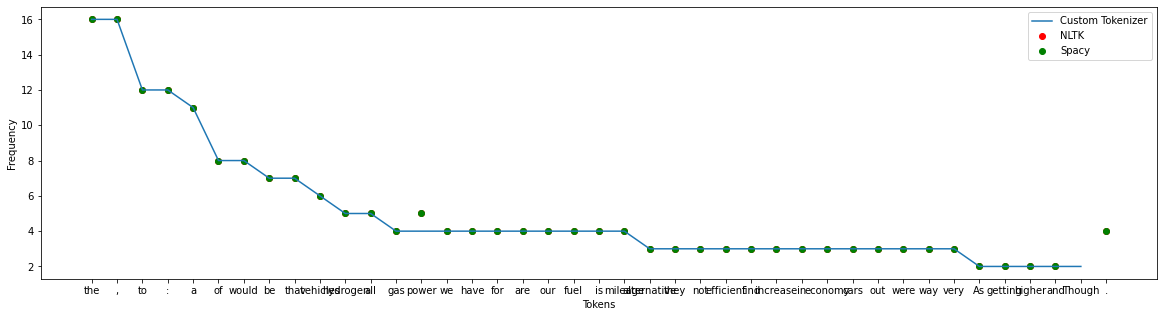

In [44]:
dicNLTK = FreqDist(tokensNLTK3)
dicSpacy = FreqDist(tokensSpacy33)
# dicNLTK = FreqDist(tokensNLTK)
diccustom = FreqDist(tokensCustom3)
filter_tokens13 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
filter_tokens23 = dict([(m, n) for m, n in dicSpacy.items() if n == 1])
filter_tokens33 = dict([(m, n) for m, n in diccustom.items() if n == 1])
observed3_1 = len(filter_tokens13)/len(dicNLTK)
observed3_2 = len(filter_tokens23)/len(dicSpacy)
observed3_3 = len(filter_tokens33)/len(diccustom)
top30_1NLTK3 = FreqDist(tokensNLTK3).most_common(40)
top30_1Spacy3 = FreqDist(tokensSpacy33).most_common(40)
top30_1Custom3 = FreqDist(tokensCustom3).most_common(40)

print("==============NLTK as grountTruth from GroundTruth File ==============")
precisionNLTKes3 = calcPrecision(tokensCustom3,tokensGroundNLTK3)    
recallNLTKes3 = calcRecall(tokensCustom3, tokensGroundNLTK3)
f1nltkENes3 = calcF1Score(precisionNLTKes3, recallNLTKes3)
print("F1 - Score = ",f1nltkENes3)
print("==============SpaCy as grountTruth from GroundTruth File ==============")
precisionSpaces3 = calcPrecision(tokensCustom3, tokensGroundSpacy3)    
recallSpaces3 = calcRecall(tokensCustom3, tokensGroundSpacy3)
f1Spaces3 = calcF1Score(precisionSpaces3, recallSpaces3)
print("F1 - Score = ",f1Spaces3)

print("==============NLTK as grountTruth==============")
precisionNLTK2es3 = calcPrecision(tokensCustom3,tokensNLTK3)    
recallNLTK2es3 = calcRecall(tokensCustom3, tokensNLTK3)
f1nltkEN2es3 = calcF1Score(precisionNLTK2es3, recallNLTK2es3)
print("F1 - Score = ",f1nltkEN2es3)
print("==============SpaCy as grountTruth==============")
precisionSpac2es3 = calcPrecision(tokensCustom3, tokensSpacy33)    
recallSpac2es3 = calcRecall(tokensCustom3, tokensSpacy33)
f1Spac2es3 = calcF1Score(precisionSpac2es3, recallSpac2es3)
print("F1 - Score = ",f1Spac2es3)
# dicNLTK = FreqDist(tokensNLTK)
# filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
# observed1_1 = len(filter_tokens1)/len(dic)
# top30_1NLTK = FreqDist(tokensNLTK).most_common(30)
# top30_1Truth = FreqDist(groundTruthTokens).most_common(30)

plt.figure(figsize=(20, 5))
plt.plot(*zip(*top30_1Custom3),label='Custom Tokenizer')
plt.scatter(*zip(*top30_1NLTK3),color = 'red',label='NLTK')
plt.scatter(*zip(*top30_1Spacy3),color = 'green',label='Spacy')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()

## Essay 4

==============NLTK as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  651
Relevant Tokens =  189
Retrieved Tokens =  444
Precision =  0.42567567567567566
Recall =  0.2903225806451613
F1 - Score =  0.3452054794520548
==============SpaCy as grountTruth from GroundTruth File ==============
No. of groundTruthTokens =  658
Relevant Tokens =  190
Retrieved Tokens =  444
Precision =  0.42792792792792794
Recall =  0.2887537993920973
F1 - Score =  0.3448275862068966
==============NLTK as grountTruth==============
No. of groundTruthTokens =  440
Relevant Tokens =  433
Retrieved Tokens =  444
Precision =  0.9752252252252253
Recall =  0.9840909090909091
F1 - Score =  0.9796380090497738
==============SpaCy as grountTruth==============
No. of groundTruthTokens =  437
Relevant Tokens =  430
Retrieved Tokens =  444
Precision =  0.9684684684684685
Recall =  0.9839816933638444
F1 - Score =  0.9761634506242906


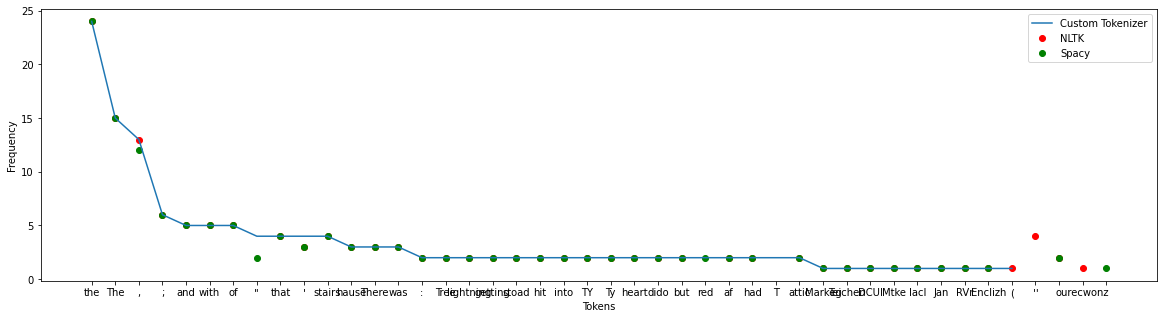

In [50]:
dicNLTK4 = FreqDist(tokensNLTK4)
dicSpacy4 = FreqDist(tokensSpacy44)
# dicNLTK = FreqDist(tokensNLTK)
diccustom4 = FreqDist(tokensCustom4)
filter_tokens14 = dict([(m, n) for m, n in dicNLTK4.items() if n == 1])
filter_tokens24 = dict([(m, n) for m, n in dicSpacy4.items() if n == 1])
filter_tokens34 = dict([(m, n) for m, n in diccustom4.items() if n == 1])
observed4_1 = len(filter_tokens14)/len(dicNLTK)
observed4_2 = len(filter_tokens24)/len(dicSpacy)
observed4_3 = len(filter_tokens34)/len(diccustom)
top30_1NLTK4 = FreqDist(tokensNLTK4).most_common(40)
top30_1Spacy4 = FreqDist(tokensSpacy44).most_common(40)
top30_1Custom4 = FreqDist(tokensCustom4).most_common(40)

print("==============NLTK as grountTruth from GroundTruth File ==============")
precisionNLTKes4 = calcPrecision(tokensCustom4,tokensGroundNLTK4)    
recallNLTKes4 = calcRecall(tokensCustom4, tokensGroundNLTK4)
f1nltkENes4 = calcF1Score(precisionNLTKes4, recallNLTKes4)
print("F1 - Score = ",f1nltkENes4)
print("==============SpaCy as grountTruth from GroundTruth File ==============")
precisionSpaces4 = calcPrecision(tokensCustom4, tokensGroundSpacy4)    
recallSpaces4 = calcRecall(tokensCustom4, tokensGroundSpacy4)
f1Spaces4 = calcF1Score(precisionSpaces4, recallSpaces4)
print("F1 - Score = ",f1Spaces4)

print("==============NLTK as grountTruth==============")
precisionNLTK2es4 = calcPrecision(tokensCustom4,tokensNLTK4)    
recallNLTK2es4 = calcRecall(tokensCustom4, tokensNLTK4)
f1nltkEN2es4 = calcF1Score(precisionNLTK2es4, recallNLTK2es4)
print("F1 - Score = ",f1nltkEN2es4)
print("==============SpaCy as grountTruth==============")
precisionSpac2es4 = calcPrecision(tokensCustom4, tokensSpacy44)    
recallSpac2es4 = calcRecall(tokensCustom4, tokensSpacy44)
f1Spac2es4 = calcF1Score(precisionSpac2es4, recallSpac2es4)
print("F1 - Score = ",f1Spac2es4)
# dicNLTK = FreqDist(tokensNLTK)
# filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
# observed1_1 = len(filter_tokens1)/len(dic)
# top30_1NLTK = FreqDist(tokensNLTK).most_common(30)
# top30_1Truth = FreqDist(groundTruthTokens).most_common(30)

plt.figure(figsize=(20, 5))
plt.plot(*zip(*top30_1Custom4),label='Custom Tokenizer')
plt.scatter(*zip(*top30_1NLTK4),color = 'red',label='NLTK')
plt.scatter(*zip(*top30_1Spacy4),color = 'green',label='Spacy')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()

Στα παραπάνω plot διακρίνουμε τα top 40 tokens ως προς την συχνότητα εμφάνισης σε όλο το κείμενο. Παρατηρούμε οτι τα άρθρα έχουν πάντα μεγάλο πλήθος εμφάνισης. Εάν δεχτούμε ως ground-truth τις κόκκινες και πράσινες κουκίδες βλέπουμε οτι η custom τεχνική tokenization (μπλέ γραμμή) συμπίπτει σε μεγάλο βαθμό με αυτές, πράγμα το οποίο μας δείχνει οτι έχει αρκετά μεγάλη ακρίβεια.  

In [56]:
info = {'percentage of tokens with Frequency = 1 per Tokenizer (Essay 1)': ['NLTK word_tokenize','SpaCy','Custom'], 'Frequency = 1 (%)': [observed1_1,observed1_2,observed1_3]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════════════════════════════════════════════════╤═════════════════════╕
│    │ percentage of tokens with Frequency = 1 per Tokenizer (Essay 1)   │   Frequency = 1 (%) │
╞════╪═══════════════════════════════════════════════════════════════════╪═════════════════════╡
│  0 │ NLTK word_tokenize                                                │            0.669456 │
├────┼───────────────────────────────────────────────────────────────────┼─────────────────────┤
│  1 │ SpaCy                                                             │            0.649789 │
├────┼───────────────────────────────────────────────────────────────────┼─────────────────────┤
│  2 │ Custom                                                            │            0.672199 │
╘════╧═══════════════════════════════════════════════════════════════════╧═════════════════════╛


In [57]:
info = {'percentage of tokens with Frequency = 1 per Tokenizer (Essay 2)': ['NLTK word_tokenize','SpaCy','Custom'], 'Frequency = 1 (%)': [observed2_1,observed2_2,observed2_3]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════════════════════════════════════════════════╤═════════════════════╕
│    │ percentage of tokens with Frequency = 1 per Tokenizer (Essay 2)   │   Frequency = 1 (%) │
╞════╪═══════════════════════════════════════════════════════════════════╪═════════════════════╡
│  0 │ NLTK word_tokenize                                                │            0.669456 │
├────┼───────────────────────────────────────────────────────────────────┼─────────────────────┤
│  1 │ SpaCy                                                             │            0.649789 │
├────┼───────────────────────────────────────────────────────────────────┼─────────────────────┤
│  2 │ Custom                                                            │            0.672199 │
╘════╧═══════════════════════════════════════════════════════════════════╧═════════════════════╛


In [58]:
info = {'percentage of tokens with Frequency = 1 per Tokenizer (Essay 3)': ['NLTK word_tokenize','SpaCy','Custom'], 'Frequency = 1 (%)': [observed3_1,observed3_2,observed3_3]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════════════════════════════════════════════════╤═════════════════════╕
│    │ percentage of tokens with Frequency = 1 per Tokenizer (Essay 3)   │   Frequency = 1 (%) │
╞════╪═══════════════════════════════════════════════════════════════════╪═════════════════════╡
│  0 │ NLTK word_tokenize                                                │            0.688525 │
├────┼───────────────────────────────────────────────────────────────────┼─────────────────────┤
│  1 │ SpaCy                                                             │            0.691892 │
├────┼───────────────────────────────────────────────────────────────────┼─────────────────────┤
│  2 │ Custom                                                            │            0.695652 │
╘════╧═══════════════════════════════════════════════════════════════════╧═════════════════════╛


In [59]:
info = {'percentage of tokens with Frequency = 1 per Tokenizer (Essay 4)': ['NLTK word_tokenize','SpaCy','Custom'], 'Frequency = 1 (%)': [observed4_1,observed4_2,observed4_3]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════════════════════════════════════════════════╤═════════════════════╕
│    │ percentage of tokens with Frequency = 1 per Tokenizer (Essay 4)   │   Frequency = 1 (%) │
╞════╪═══════════════════════════════════════════════════════════════════╪═════════════════════╡
│  0 │ NLTK word_tokenize                                                │            0.912023 │
├────┼───────────────────────────────────────────────────────────────────┼─────────────────────┤
│  1 │ SpaCy                                                             │            0.908824 │
├────┼───────────────────────────────────────────────────────────────────┼─────────────────────┤
│  2 │ Custom                                                            │            0.909621 │
╘════╧═══════════════════════════════════════════════════════════════════╧═════════════════════╛


Παραπάνω βλέπουμε το ποσοστό των tokens που εμφανίστηκαν στο κείμενο ακριβώς μια φορά. Το ποσοστό ανέρχεται στο 65% περίπου ενώ σύμφωνα με τον νόμο του Zipf το ποσοστό αυτό είναι περίπου 50%.

In [60]:

info = {'Tokenizer (Essay 1)': ['NLTK as GroundTruth from File','SpaCy as GroundTruth from File'], 'F1-Score': [f1nltkEN,f1Spac],
       'Precision':[precisionNLTK,precisionSpac],'Recall':[recallNLTK,recallSpac]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤════════════════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer (Essay 1)            │   F1-Score │   Precision │   Recall │
╞════╪════════════════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth from File  │   0.91965  │    0.936791 │ 0.903125 │
├────┼────────────────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth from File │   0.894737 │    0.936791 │ 0.856296 │
╘════╧════════════════════════════════╧════════════╧═════════════╧══════════╛


In [62]:
info = {'Tokenizer (Essay 1)': ['NLTK as GroundTruth','SpaCy as GroundTruth'], 'F1-Score': [f1nltkEN2,f1Spac2],
       'Precision':[precisionNLTK2,precisionSpac2],'Recall':[recallNLTK2,recallSpac2]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer (Essay 1)   │   F1-Score │   Precision │   Recall │
╞════╪═══════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth   │   0.978278 │    0.985413 │ 0.971246 │
├────┼───────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth  │   0.970329 │    0.980551 │ 0.960317 │
╘════╧═══════════════════════╧════════════╧═════════════╧══════════╛


In [61]:
info = {'Tokenizer (Essay 2)': ['NLTK as GroundTruth from File','SpaCy as GroundTruth from File'], 'F1-Score': [f1nltkENes2,f1Spaces2],
       'Precision':[precisionNLTKes2,precisionSpaces2],'Recall':[recallNLTKes2,recallSpaces2]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤════════════════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer (Essay 2)            │   F1-Score │   Precision │   Recall │
╞════╪════════════════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth from File  │   0.817337 │    0.889888 │ 0.755725 │
├────┼────────────────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth from File │   0.800399 │    0.901124 │ 0.719928 │
╘════╧════════════════════════════════╧════════════╧═════════════╧══════════╛


In [63]:
info = {'Tokenizer (Essay 2)': ['NLTK as GroundTruth','SpaCy as GroundTruth'], 'F1-Score': [f1nltkEN2es2,f1Spac2es2],
       'Precision':[precisionNLTK2es2,precisionSpac2es2],'Recall':[recallNLTK2es2,recallSpac2es2]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer (Essay 2)   │   F1-Score │   Precision │   Recall │
╞════╪═══════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth   │   0.979866 │    0.98427  │ 0.975501 │
├────┼───────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth  │   0.945856 │    0.961798 │ 0.930435 │
╘════╧═══════════════════════╧════════════╧═════════════╧══════════╛


In [64]:
info = {'Tokenizer (Essay 3)': ['NLTK as GroundTruth from File','SpaCy as GroundTruth from File'], 'F1-Score': [f1nltkENes3,f1Spaces3],
       'Precision':[precisionNLTKes3,precisionSpaces3],'Recall':[recallNLTKes3,recallSpaces3]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤════════════════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer (Essay 3)            │   F1-Score │   Precision │   Recall │
╞════╪════════════════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth from File  │   0.935351 │    0.939227 │ 0.931507 │
├────┼────────────────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth from File │   0.931507 │    0.939227 │ 0.923913 │
╘════╧════════════════════════════════╧════════════╧═════════════╧══════════╛


In [65]:
info = {'Tokenizer (Essay 3)': ['NLTK as GroundTruth','SpaCy as GroundTruth'], 'F1-Score': [f1nltkEN2es3,f1Spac2es3],
       'Precision':[precisionNLTK2es3,precisionSpac2es3],'Recall':[recallNLTK2es3,recallSpac2es3]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer (Essay 3)   │   F1-Score │   Precision │   Recall │
╞════╪═══════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth   │   0.979367 │    0.983425 │ 0.975342 │
├────┼───────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth  │   0.97668  │    0.983425 │ 0.970027 │
╘════╧═══════════════════════╧════════════╧═════════════╧══════════╛


In [66]:
info = {'Tokenizer (Essay 4)': ['NLTK as GroundTruth from File','SpaCy as GroundTruth from File'], 'F1-Score': [f1nltkENes4,f1Spaces4],
       'Precision':[precisionNLTKes4,precisionSpaces4],'Recall':[recallNLTKes4,recallSpaces4]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤════════════════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer (Essay 4)            │   F1-Score │   Precision │   Recall │
╞════╪════════════════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth from File  │   0.345205 │    0.425676 │ 0.290323 │
├────┼────────────────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth from File │   0.344828 │    0.427928 │ 0.288754 │
╘════╧════════════════════════════════╧════════════╧═════════════╧══════════╛


In [67]:
info = {'Tokenizer (Essay 4)': ['NLTK as GroundTruth','SpaCy as GroundTruth'], 'F1-Score': [f1nltkEN2es4,f1Spac2es4],
       'Precision':[precisionNLTK2es4,precisionSpac2es4],'Recall':[recallNLTK2es4,recallSpac2es4]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer (Essay 4)   │   F1-Score │   Precision │   Recall │
╞════╪═══════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth   │   0.979638 │    0.975225 │ 0.984091 │
├────┼───────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth  │   0.976163 │    0.968468 │ 0.983982 │
╘════╧═══════════════════════╧════════════╧═════════════╧══════════╛


# Stemmer

In [68]:
print("==============NLTK as grountTruth from GroundTruth File and Porter==============")
precisionNLTKPorter1 = calcPrecision(stemsCustomNLTK1,stemsGroundNLTKPorter11)    
recallNLTKPorter1 = calcRecall(stemsCustomNLTK1, stemsGroundNLTKPorter11)
f1nltkENPorter1 = calcF1Score(precisionNLTKPorter1, recallNLTKPorter1)
print("F1 - Score = ",f1nltkENPorter1)
print("==============SpaCy as grountTruth from GroundTruth File and Porter==============")
precisionSpacPorter12 = calcPrecision(stemsCustomSpacy1, stemsGroundSpaCyPorter11)    
recallSpacPorter12 = calcRecall(stemsCustomSpacy1, stemsGroundSpaCyPorter11)
f1SpacPorter12 = calcF1Score(precisionSpacPorter12, recallSpacPorter12)
print("F1 - Score = ",f1SpacPorter12)

print("==============NLTK as grountTruth from GroundTruth File and SnowBall==============")
precisionNLTKSnow13 = calcPrecision(stemsCustomNLTK1,stemsGroundNLTKSnow11)    
recallNLTKSnow13 = calcRecall(stemsCustomNLTK1, stemsGroundNLTKSnow11)
f1nltkENSnow13 = calcF1Score(precisionNLTKSnow13, recallNLTKSnow13)
print("F1 - Score = ",f1nltkENSnow13)
print("==============SpaCy as grountTruth from GroundTruth File and SnowBall==============")
precisionSpacSnow14 = calcPrecision(stemsCustomSpacy1, stemsGroundSpaCySnow11)    
recallSpacSnow14 = calcRecall(stemsCustomSpacy1, stemsGroundSpaCySnow11)
f1SpacPSnow14 = calcF1Score(precisionSpacSnow14, recallSpacSnow14)
print("F1 - Score = ",f1SpacPSnow14)



==============NLTK as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  640
Relevant Tokens =  482
Retrieved Tokens =  626
Precision =  0.7699680511182109
Recall =  0.753125
F1 - Score =  0.7614533965244866
==============SpaCy as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  675
Relevant Tokens =  484
Retrieved Tokens =  630
Precision =  0.7682539682539683
Recall =  0.717037037037037
F1 - Score =  0.7417624521072796
==============NLTK as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  640
Relevant Tokens =  474
Retrieved Tokens =  626
Precision =  0.7571884984025559
Recall =  0.740625
F1 - Score =  0.7488151658767771
==============SpaCy as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  675
Relevant Tokens =  476
Retrieved Tokens =  630
Precision =  0.7555555555555555
Recall =  0.7051851851851851
F1 - Score =  0.7295019157088123

In [69]:
info = {'Tokenizer and Stemmer (Essay 1)': ['NLTK and Porter as GroundTruth','SpaCy and Porter as GroundTruth','NLTK and SnowBall as GroundTruth','SpaCy and Snowball as GroundTruth'], 
        'F1-Score': [f1nltkENPorter1,f1SpacPorter12,f1nltkENSnow13,f1SpacPSnow14],
       'Precision':[precisionNLTKPorter1,precisionSpacPorter12,precisionNLTKSnow13,precisionSpacSnow14],'Recall':[recallNLTKPorter1,recallSpacPorter12,recallNLTKSnow13,recallSpacSnow14]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer and Stemmer (Essay 1)   │   F1-Score │   Precision │   Recall │
╞════╪═══════════════════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK and Porter as GroundTruth    │   0.761453 │    0.769968 │ 0.753125 │
├────┼───────────────────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy and Porter as GroundTruth   │   0.741762 │    0.768254 │ 0.717037 │
├────┼───────────────────────────────────┼────────────┼─────────────┼──────────┤
│  2 │ NLTK and SnowBall as GroundTruth  │   0.748815 │    0.757188 │ 0.740625 │
├────┼───────────────────────────────────┼────────────┼─────────────┼──────────┤
│  3 │ SpaCy and Snowball as GroundTruth │   0.729502 │    0.755556 │ 0.705185 │
╘════╧═══════════════════════════════════╧════════════╧═════════════╧══════════╛


In [70]:
print("==============NLTK as grountTruth from GroundTruth File and Porter==============")
precisionNLTKPorter2 = calcPrecision(stemsCustomNLTK2,stemsGroundNLTKPorter22)    
recallNLTKPorter2 = calcRecall(stemsCustomNLTK2, stemsGroundNLTKPorter22)
f1nltkENPorter2 = calcF1Score(precisionNLTKPorter2, recallNLTKPorter2)
print("F1 - Score = ",f1nltkENPorter2)
print("==============SpaCy as grountTruth from GroundTruth File and Porter==============")
precisionSpacPorter22 = calcPrecision(stemsCustomSpacy2, stemsGroundSpaCyPorter22)    
recallSpacPorter22 = calcRecall(stemsCustomSpacy2, stemsGroundSpaCyPorter22)
f1SpacPorter22 = calcF1Score(precisionSpacPorter22, recallSpacPorter22)
print("F1 - Score = ",f1SpacPorter22)

print("==============NLTK as grountTruth from GroundTruth File and SnowBall==============")
precisionNLTKSnow23 = calcPrecision(stemsCustomNLTK2,stemsGroundNLTKSnow22)    
recallNLTKSnow23 = calcRecall(stemsCustomNLTK2, stemsGroundNLTKSnow22)
f1nltkENSnow23 = calcF1Score(precisionNLTKSnow23, recallNLTKSnow23)
print("F1 - Score = ",f1nltkENSnow23)
print("==============SpaCy as grountTruth from GroundTruth File and SnowBall==============")
precisionSpacSnow24 = calcPrecision(stemsCustomSpacy2, stemsGroundSpaCySnow22)    
recallSpacSnow24 = calcRecall(stemsCustomSpacy2, stemsGroundSpaCySnow22)
f1SpacPSnow24 = calcF1Score(precisionSpacSnow24, recallSpacSnow24)
print("F1 - Score = ",f1SpacPSnow24)


info = {'Tokenizer and Stemmer (Essay 2)': ['NLTK and Porter as GroundTruth','SpaCy and Porter as GroundTruth','NLTK and SnowBall as GroundTruth','SpaCy and Snowball as GroundTruth'], 
        'F1-Score': [f1nltkENPorter2,f1SpacPorter22,f1nltkENSnow23,f1SpacPSnow24],
       'Precision':[precisionNLTKPorter2,precisionSpacPorter22,precisionNLTKSnow23,precisionSpacSnow24],'Recall':[recallNLTKPorter2,recallSpacPorter22,recallNLTKSnow23,recallSpacSnow24]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

==============NLTK as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  524
Relevant Tokens =  337
Retrieved Tokens =  449
Precision =  0.7505567928730512
Recall =  0.6431297709923665
F1 - Score =  0.6927029804727647
==============SpaCy as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  557
Relevant Tokens =  343
Retrieved Tokens =  460
Precision =  0.7456521739130435
Recall =  0.6157989228007181
F1 - Score =  0.6745329400196657
==============NLTK as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  524
Relevant Tokens =  326
Retrieved Tokens =  449
Precision =  0.7260579064587973
Recall =  0.6221374045801527
F1 - Score =  0.6700924974306269
==============SpaCy as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  557
Relevant Tokens =  331
Retrieved Tokens =  460
Precision =  0.7195652173913043
Recall =  0.5942549371633752
F1 - Score 

In [71]:
print("==============NLTK as grountTruth from GroundTruth File and Porter==============")
precisionNLTKPorter3 = calcPrecision(stemsCustomNLTK3,stemsGroundNLTKPorter33)    
recallNLTKPorter3 = calcRecall(stemsCustomNLTK3, stemsGroundNLTKPorter33)
f1nltkENPorter3 = calcF1Score(precisionNLTKPorter3, recallNLTKPorter3)
print("F1 - Score = ",f1nltkENPorter3)
print("==============SpaCy as grountTruth from GroundTruth File and Porter==============")
precisionSpacPorter32 = calcPrecision(stemsCustomSpacy3, stemsGroundSpaCyPorter33)    
recallSpacPorter32 = calcRecall(stemsCustomSpacy3, stemsGroundSpaCyPorter33)
f1SpacPorter32 = calcF1Score(precisionSpacPorter32, recallSpacPorter32)
print("F1 - Score = ",f1SpacPorter32)

print("==============NLTK as grountTruth from GroundTruth File and SnowBall==============")
precisionNLTKSnow33 = calcPrecision(stemsCustomNLTK3,stemsGroundNLTKSnow33)    
recallNLTKSnow33 = calcRecall(stemsCustomNLTK3, stemsGroundNLTKSnow33)
f1nltkENSnow33 = calcF1Score(precisionNLTKSnow33, recallNLTKSnow33)
print("F1 - Score = ",f1nltkENSnow33)
print("==============SpaCy as grountTruth from GroundTruth File and SnowBall==============")
precisionSpacSnow34 = calcPrecision(stemsCustomSpacy3, stemsGroundSpaCySnow33)    
recallSpacSnow34 = calcRecall(stemsCustomSpacy3, stemsGroundSpaCySnow33)
f1SpacPSnow34 = calcF1Score(precisionSpacSnow34, recallSpacSnow34)
print("F1 - Score = ",f1SpacPSnow24)


info = {'Tokenizer and Stemmer (Essay 3)': ['NLTK and Porter as GroundTruth','SpaCy and Porter as GroundTruth','NLTK and SnowBall as GroundTruth','SpaCy and Snowball as GroundTruth'], 
        'F1-Score': [f1nltkENPorter3,f1SpacPorter32,f1nltkENSnow33,f1SpacPSnow34],
       'Precision':[precisionNLTKPorter3,precisionSpacPorter32,precisionNLTKSnow33,precisionSpacSnow34],'Recall':[recallNLTKPorter3,recallSpacPorter32,recallNLTKSnow33,recallSpacSnow34]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

==============NLTK as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  365
Relevant Tokens =  269
Retrieved Tokens =  365
Precision =  0.736986301369863
Recall =  0.736986301369863
F1 - Score =  0.7369863013698631
==============SpaCy as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  368
Relevant Tokens =  269
Retrieved Tokens =  367
Precision =  0.7329700272479565
Recall =  0.7309782608695652
F1 - Score =  0.7319727891156463
==============NLTK as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  365
Relevant Tokens =  264
Retrieved Tokens =  365
Precision =  0.7232876712328767
Recall =  0.7232876712328767
F1 - Score =  0.7232876712328767
==============SpaCy as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  368
Relevant Tokens =  264
Retrieved Tokens =  367
Precision =  0.7193460490463215
Recall =  0.717391304347826
F1 - Score =  

In [72]:
print("==============NLTK as grountTruth from GroundTruth File and Porter==============")
precisionNLTKPorter4 = calcPrecision(stemsCustomNLTK4,stemsGroundNLTKPorter44)    
recallNLTKPorter4 = calcRecall(stemsCustomNLTK4, stemsGroundNLTKPorter44)
f1nltkENPorter4 = calcF1Score(precisionNLTKPorter4, recallNLTKPorter4)
print("F1 - Score = ",f1nltkENPorter4)
print("==============SpaCy as grountTruth from GroundTruth File and Porter==============")
precisionSpacPorter42 = calcPrecision(stemsCustomSpacy4, stemsGroundSpaCyPorter44)    
recallSpacPorter42 = calcRecall(stemsCustomSpacy4, stemsGroundSpaCyPorter44)
f1SpacPorter42 = calcF1Score(precisionSpacPorter42, recallSpacPorter42)
print("F1 - Score = ",f1SpacPorter42)

print("==============NLTK as grountTruth from GroundTruth File and SnowBall==============")
precisionNLTKSnow43 = calcPrecision(stemsCustomNLTK4,stemsGroundNLTKSnow44)    
recallNLTKSnow43 = calcRecall(stemsCustomNLTK4, stemsGroundNLTKSnow44)
f1nltkENSnow43 = calcF1Score(precisionNLTKSnow43, recallNLTKSnow43)
print("F1 - Score = ",f1nltkENSnow43)
print("==============SpaCy as grountTruth from GroundTruth File and SnowBall==============")
precisionSpacSnow44 = calcPrecision(stemsCustomSpacy4, stemsGroundSpaCySnow44)    
recallSpacSnow44 = calcRecall(stemsCustomSpacy4, stemsGroundSpaCySnow44)
f1SpacPSnow44 = calcF1Score(precisionSpacSnow44, recallSpacSnow44)
print("F1 - Score = ",f1SpacPSnow44)


info = {'Tokenizer and Stemmer (Essay 2)': ['NLTK and Porter as GroundTruth','SpaCy and Porter as GroundTruth','NLTK and SnowBall as GroundTruth','SpaCy and Snowball as GroundTruth'], 
        'F1-Score': [f1nltkENPorter4,f1SpacPorter42,f1nltkENSnow43,f1SpacPSnow44],
       'Precision':[precisionNLTKPorter4,precisionSpacPorter42,precisionNLTKSnow43,precisionSpacSnow44],'Recall':[recallNLTKPorter4,recallSpacPorter42,recallNLTKSnow43,recallSpacSnow44]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

==============NLTK as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  651
Relevant Tokens =  148
Retrieved Tokens =  440
Precision =  0.33636363636363636
Recall =  0.22734254992319508
F1 - Score =  0.27131072410632445
==============SpaCy as grountTruth from GroundTruth File and Porter==============
No. of groundTruthTokens =  658
Relevant Tokens =  148
Retrieved Tokens =  437
Precision =  0.33867276887871856
Recall =  0.22492401215805471
F1 - Score =  0.27031963470319637
==============NLTK as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  651
Relevant Tokens =  142
Retrieved Tokens =  440
Precision =  0.32272727272727275
Recall =  0.21812596006144394
F1 - Score =  0.2603116406966086
==============SpaCy as grountTruth from GroundTruth File and SnowBall==============
No. of groundTruthTokens =  658
Relevant Tokens =  142
Retrieved Tokens =  437
Precision =  0.32494279176201374
Recall =  0.21580547112462006
F